Saving processed_diabetes_dataset.csv to processed_diabetes_dataset (5).csv


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


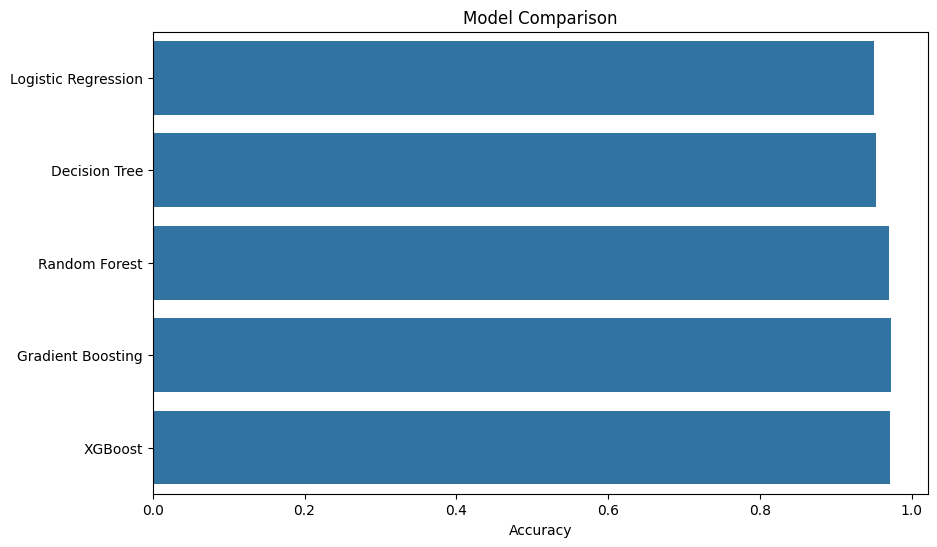

Best Model: Gradient Boosting with Accuracy: 0.9725

Classification Reports for all models:

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.79      0.56      0.66      1708

    accuracy                           0.95     20000
   macro avg       0.88      0.77      0.81     20000
weighted avg       0.95      0.95      0.95     20000


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.72      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95  

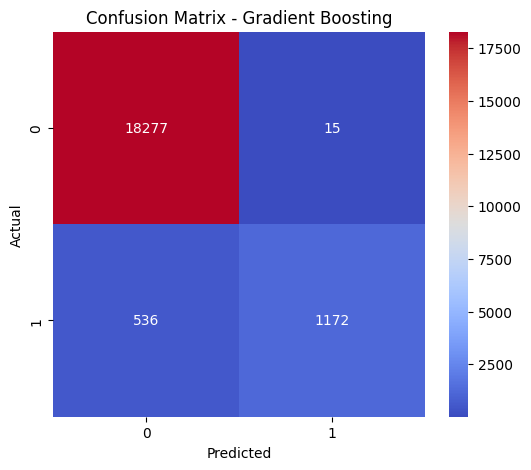

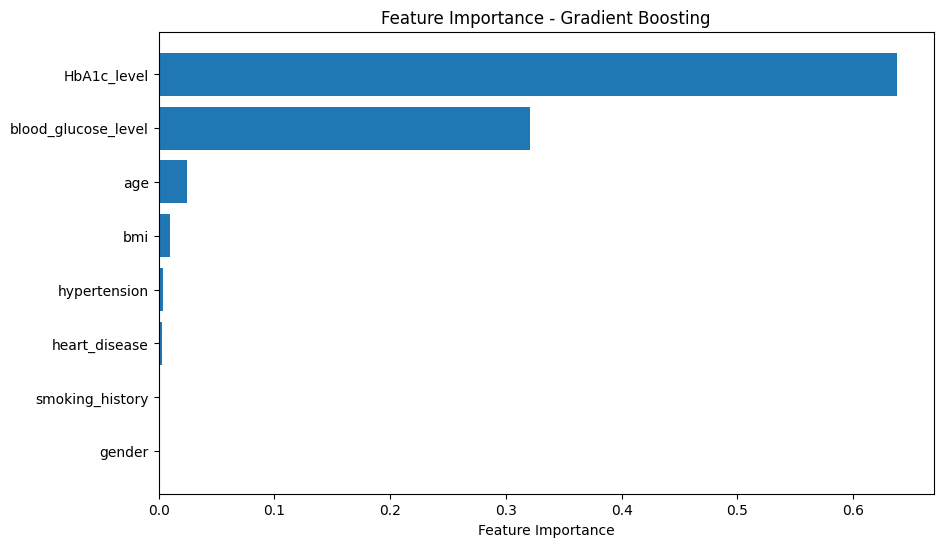

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
import io

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
conf_matrices = {}
class_reports = {}
feature_importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    class_reports[name] = classification_report(y_test, y_pred)
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

best_model = max(results, key=results.get)

plt.figure(figsize=(10,6))
sns.barplot(x=list(results.values()), y=list(results.keys()))
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.show()

print(f"Best Model: {best_model} with Accuracy: {results[best_model]:.4f}\n")
print("Classification Reports for all models:\n")
for name, report in class_reports.items():
    print(f"{name} Classification Report:\n{report}\n")

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrices[best_model], annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"Confusion Matrix - {best_model}")
plt.show()

if best_model in feature_importances:
    plt.figure(figsize=(10,6))
    sorted_idx = np.argsort(feature_importances[best_model])
    plt.barh(X.columns[sorted_idx], feature_importances[best_model][sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance - {best_model}")
    plt.show()
